In [20]:
import homcloud.interface as hc
import copy
import math
import sympy
from sympy.geometry import *

In [33]:
#PH計算の引数の都合上加えていたz軸の値を除去する
def three_to_two(p):
    newp = [[(p[i][0][0], p[i][0][1]), (p[i][1][0], p[i][1][1])] for i in range(len(p))]
    return newp

In [32]:
#sympyの多角形計算モジュールを使うためにバウンダリーの順番を整える
def n_order(boundary):
    s = copy.deepcopy(boundary)
    order = [s[0]]
    s.remove(s[0])
    l = len(s)
    for i in range(len(s)):
        for j in range(len(s)):
            try:
                if order[i][0] in s[j] or order[i][1] in s[j]:
                    order.append(s[j])
                    s.remove(s[j])
                    break
            except:
                if len(order) > l/2:
                    return order
                else:
                    return None
    return order

In [34]:
#面積を計算する
def area(boundary):
    new_order = n_order(boundary)
    if new_order == None:
        return math.nan
    path = copy.deepcopy(new_order)
    b = []
    if path[0][0] in path[1]:
        b.append(path[0][0])
    else:
        b.append(path[0][1])
    for i in range(len(path)-1):
        for j in range(2):
            if path[i+1][j] not in b:
                b.append(path[i+1][j])
    #print(b)
    polygon = Polygon( *b )
    area = math.fabs(polygon.area)
    return area

In [35]:
#仮想的なノイズを動かしてStable volumeの出力の変化を確認する
#if __name__ == '__main__':
def repeat(r):
    pdlist = hc.PDList("pointcloud-maru.pdgm")
    pd1 = pdlist.dth_diagram(1)
    pair = pd1.nearest_pair_to(0.025, 0.26)
    lifetime = pair.lifetime()
    minus = lifetime/r
    
    epsilon=[]
    quantity=[]
    s=[]
    
    for i in range(r-1):
        stable_volume = pair.stable_volume(minus*i)
        epsilon += [minus*i]
        quantity += [len(stable_volume.boundary())]
        path = three_to_two(stable_volume.boundary())
        s += [area(path)]
    
    return epsilon, quantity, s

In [28]:
epsilon, quantity, s = repeat(1001)

In [29]:
from matplotlib import pyplot as plt

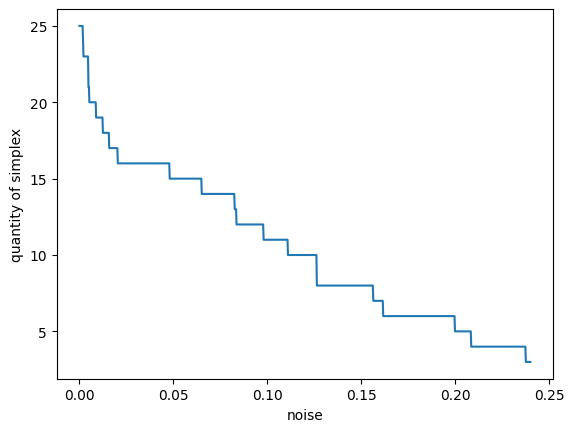

In [30]:
plt.plot(epsilon, quantity)
plt.xlabel('noise')
plt.ylabel('quantity of simplex')
plt.savefig("plateau")
plt.show()

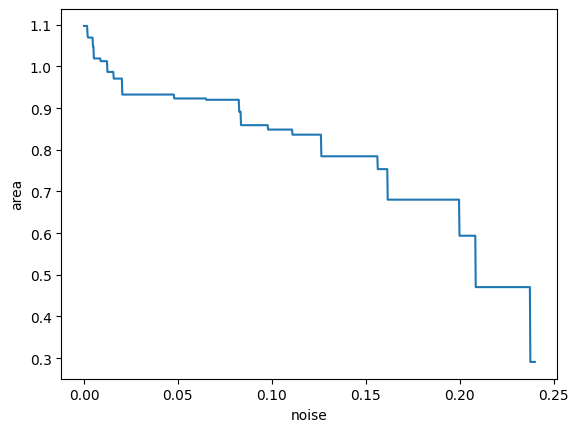

In [31]:
plt.plot(epsilon, s)
plt.xlabel('noise')
plt.ylabel('area')
plt.savefig("area")
plt.show()